In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom, norm

In [54]:
N = 100
mu_g, sigma_g = 0, 1
x = np.random.normal(mu_g, sigma_g,N)

In [93]:
N_bins=20
mybins = np.linspace(-3,3,N_bins)
bin_to_study = int(N_bins/2)
mybins[bin_to_study], mybins[bin_to_study+1]

(0.1578947368421053, 0.4736842105263155)

In [94]:
bin_width = (mybins[bin_to_study+1]-mybins[bin_to_study])
middle_of_bin = 0.5*(mybins[bin_to_study]+ mybins[bin_to_study+1])

In [95]:
# probability to land in the specific bin
p = norm.cdf(mybins[bin_to_study+1], mu_g, sigma_g) \
    - norm.cdf(mybins[bin_to_study], mu_g, sigma_g)
p

0.1194073154615437

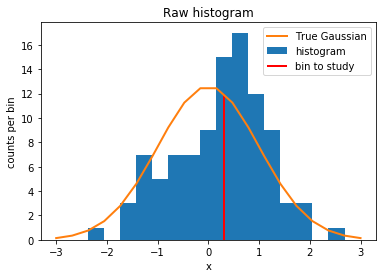

In [96]:
# Raw Histogram
counts, bins, patches = plt.hist(x,bins=mybins,density=False,label='histogram')
plt.vlines(middle_of_bin,0.,p*N, lw=2,color='r',label='bin to study')
plt.plot(mybins,N*bin_width*norm.pdf(mybins,mu_g,sigma_g), lw=2, label='True Gaussian')
plt.xlabel('x')
plt.ylabel('counts per bin')
plt.title('Raw histogram')
plt.legend()

In [97]:
# check counts in bin to study
counts[bin_to_study]

15.0

In [98]:
# Expected number in that bin
N*p

11.940731546154371

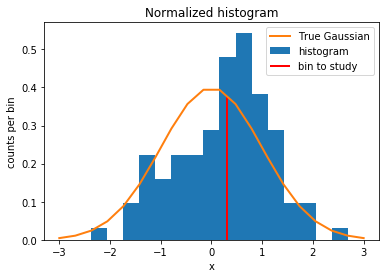

In [99]:
# Normalized Histogram, note changes to normalization for each line
density, bins, patches = plt.hist(x,bins=mybins,density=True,label='histogram')
plt.vlines(middle_of_bin,0.,p/bin_width, lw=2,color='r',label='bin to study') 
plt.plot(mybins,norm.pdf(mybins,mu_g,sigma_g), lw=2,label='True Gaussian') 
plt.xlabel('x')
plt.ylabel('counts per bin')
plt.title('Normalized histogram')
plt.legend()

In [100]:
# check observed frequency in bin to study
density[bin_to_study]*bin_width

0.1515151515151515

In [101]:
# compare to prob
p

0.1194073154615437

## Binomial

In [102]:
rv = binom(N,p)

In [103]:
rv.mean(), rv.std()

(11.940731546154371, 3.242671868626412)

In [104]:
rv.pmf(int(rv.mean()))

0.12119269889783806

In [105]:
k_for_plot = np.arange(binom.ppf(0.01, N, p),  binom.ppf(0.99, N, p))

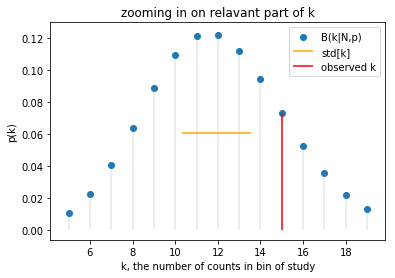

In [124]:
plt.vlines(k_for_plot,0,rv.pmf(k_for_plot), alpha=0.2, color='grey')
plt.scatter(k_for_plot,rv.pmf(k_for_plot),label='B(k|N,p)')
plt.hlines(.5*rv.pmf(int(rv.mean())), rv.mean()-.5*rv.std(), rv.mean()+.5*rv.std(), color='orange',label='std[k]')
plt.vlines(counts[bin_to_study],0,rv.pmf(counts[bin_to_study]), color='r',label='observed k')
#plt.ylim(0, 1.2*np.max(rv.pmf(k_for_plot)))
plt.xlabel('k, the number of counts in bin of study')
plt.ylabel('p(k)')
plt.title('zooming in on relavant part of k')
plt.legend()

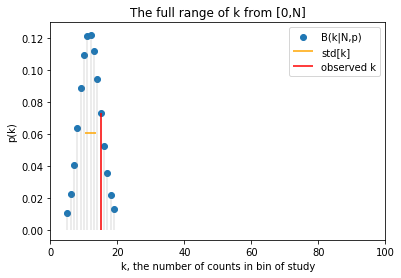

In [125]:
plt.vlines(k_for_plot,0,rv.pmf(k_for_plot), alpha=0.2, color='grey')
plt.scatter(k_for_plot,rv.pmf(k_for_plot),label='B(k|N,p)')
plt.hlines(.5*rv.pmf(int(rv.mean())), rv.mean()-.5*rv.std(), rv.mean()+.5*rv.std(), color='orange',label='std[k]')
plt.vlines(counts[bin_to_study],0,rv.pmf(counts[bin_to_study]), color='r',label='observed k')
#plt.ylim(0, 1.2*np.max(rv.pmf(k_for_plot)))
plt.xlim(0,N)
plt.xlabel('k, the number of counts in bin of study')
plt.ylabel('p(k)')
plt.title('The full range of k from [0,N]')
plt.legend()